In [10]:
import matplotlib as mpl

# 現在のフォントサイズを取得
current_font_size = mpl.rcParams['font.size']

# フォントサイズを1.5倍に設定
mpl.rcParams['font.size'] = current_font_size * 1.5

# フォントファミリーを設定
mpl.rcParams['font.family'] = 'Noto Sans CJK JP'

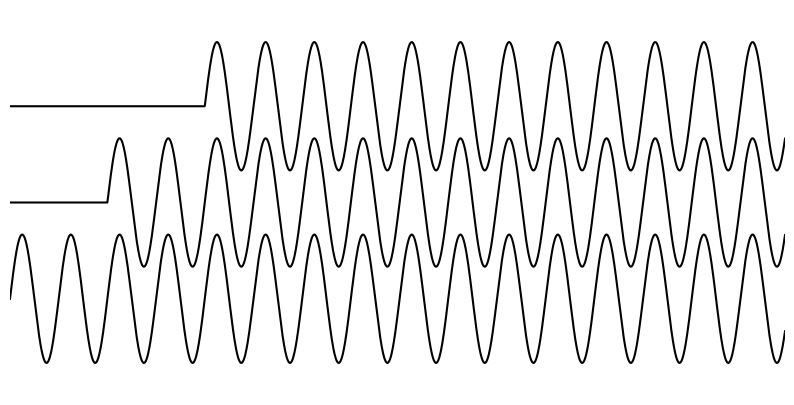

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# パラメータ設定
# -----------------------
omega = 1.0               # 基本波の角周波数
omega_sh = 2.0 * omega    # 2ωの波
t_min, t_max = 0, 50      # 横軸の範囲
t = np.linspace(t_min, t_max, 2000)

# 2ωの波長：λ_SH = 2π/(2ω) = π (ω=1の場合)
wavelength_sh = np.pi  
shift_per_wave = 2 * wavelength_sh  # 2波長分 (2π)のシフト

# 各波の開始時刻（それぞれ2波長ずつずらす）
shifts = [0,
          shift_per_wave,       # 2π
          2 * shift_per_wave]   # 4π

# 縦方向オフセット（波が重ならないように）
offsets = [0.0, 1.5, 3.0]

# -----------------------
# 波の定義 (途中から始まる)
# -----------------------
def delayed_wave(t_array, start_t):
    """
    t_array >= start_t のとき sin(2ω (t - start_t))、
    それ以外は 0 を返す。
    """
    return np.where(t_array >= start_t,
                    np.sin(omega_sh * (t_array - start_t)),
                    0.0)

# -----------------------
# プロット
# -----------------------
plt.figure(figsize=(10, 5))
for st, off in zip(shifts, offsets):
    y = delayed_wave(t, st)
    plt.plot(t, y + off, color='black')

plt.xlim(t_min, t_max)
plt.ylim(-1.5, offsets[-1] + 1.5)

# 軸の目盛り・ラベル、枠線を非表示にする
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()
